### Clustering IRIS Data

In [1]:
# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

### Load the Data Set
The iris dataset comes with the scikit learn package and can be imported from the <code>sklearn.datasets</code>

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_df = pd.DataFrame(load_iris().data)
iris_df.columns = list(load_iris().feature_names)

# Let us look at few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Let us look at the different Species of each flower in the dataset

print(load_iris().target_names)

['setosa' 'versicolor' 'virginica']


#### Let us define our feature set, the feature set will contain all the numerical data for this dataset except the <code>Id/Index</code> column.
Then we convert the <code>NA</code> values to numerical values if any, and after that we normalize the dataset using <code>Standard Scaler()</code> function from the <code>sklearn.preprocessing</code> module. This will scale the values to be between a specific range.

In [5]:
# Define the input variables
X = iris_df.values

# convert the NA values
X = np.nan_to_num(X)

# Normalize the dataset
feature_set = StandardScaler().fit_transform(X)

# Lets us look at few rows
feature_set[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

#### Choosing the best number of cluster

In KMeans clustering we cluster the dataset into different cluster on the basis of their characteristics and behaviour. We explicitly define the number of clusters or the cluster centers/centroids. The algorithms keeps on iterating till it minizes the sum of squares within its cluster. The centroids keeps moving untill no more minimization can take place.<br><br>

Choosing a best number of cluster can some time be hectic and challenging, hence we iterate over a number of different clusters and select the best number of cluster for the given model<br><br>

Lets us plot the value of number of cluster with the inertia and look for the elbow point.


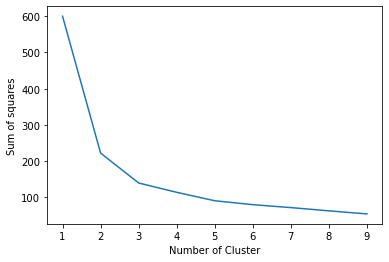

In [6]:
# Define a space for the sum of squares
inertia = []

# Iterate over a range of values
for i in range(1, 10):
    # Instantiate the kmeans operator, with the n_cluster = i
    kmeans_i = KMeans(init = 'k-means++', n_init = 10, random_state = 0, n_clusters = i)

    # Fit the transformed data
    kmeans_i.fit(feature_set)

    # Append the sum of squares to the list 
    inertia.append(kmeans_i.inertia_)

# Plot the values of sum of squares with the value of n_cluster 
plt.plot(range(1, 10), inertia)

# Name the axes
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of squares')

plt.show()

Increasing the number of centroids further will lead more decreasing result. Clearly the elbow point is at cluster = 3, hence the optimal value of number of cluster is 3

### Modelling using KMeans Clustering

In [7]:
# define the number of cluster
kluster = 3

# Instantiate the KMeans
# with number of iteration to 12 and number of cluster to 3 
k_means = KMeans(init = 'k-means++', n_clusters = kluster, n_init = 12)

# Fit the feature set to the model
k_means.fit(feature_set)


KMeans(n_clusters=3, n_init=12)

In [8]:
# Let us look at the labels 
labels = k_means.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Now that we have our labels, let us add these labels to the dataframe

In [9]:
iris_df['Cluster Labels'] = labels
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
# Take a look at the cluster centers

cluster_centers = k_means.cluster_centers_
cluster_centers

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

#### Now we have the center of the cluster, we can plot the data points with their specific cluster

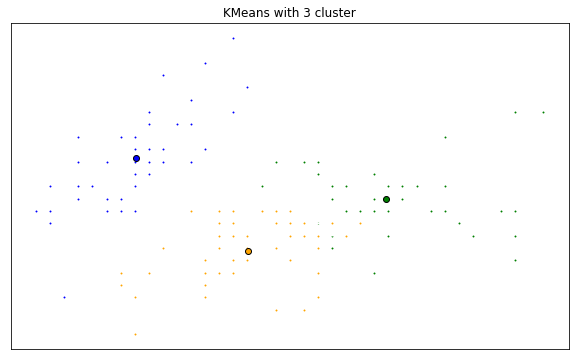

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize = (10, 6))

# colors for different cluster
colors = ['green', 'blue', 'orange']

# For the loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each data point is in.
for k, col in zip(range(kluster), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    k_members = (labels == k)
    
    # Define the centroid, or cluster center.
    k_center = cluster_centers[k]
    
    # Plots the datapoints with color col.
    plt.plot(feature_set[k_members, 0], feature_set[k_members, 1], 'w', markerfacecolor = col, marker = '.')
    
    # Plots the centroids with specified color, but with a darker outline
    plt.plot(k_center[0], k_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)
    

# Title of the plot
plt.title('KMeans with 3 cluster')

# Remove x-axis ticks
plt.xticks(())

# Remove y-axis ticks
plt.yticks(())

# Show the plot
plt.show()

### Let us look at the different cluster with different number of centroids

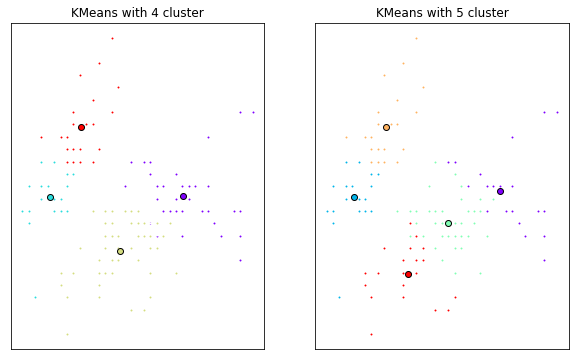

In [12]:
# define the number of cluster
kluster = [4, 5]

fig = plt.figure(figsize = (10, 6))

for i, clstr in zip(range(1, len(kluster)+1), kluster):

    # Instantiate the KMeans
    # with number of iteration to 12 and number of cluster to 3 
    k_means = KMeans(init = 'k-means++', n_clusters = clstr, n_init = 12)

    # Fit the feature set to the model
    k_means.fit(feature_set)

    colors = plt.cm.rainbow(np.linspace(0, 1, len(set(k_means.labels_))))

    ax = fig.add_subplot(1, 2, i)

    for k, col in zip(range(clstr), colors):
        k_members = (k_means.labels_ == k)
        
        k_center = k_means.cluster_centers_[k]
        
        ax.plot(feature_set[k_members, 0], feature_set[k_members, 1], 'w', markerfacecolor = col, marker = '.')
        
        ax.plot(k_center[0], k_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)
    
    # Remove x-axis ticks
    ax.set_xticks(())
    
    # Remove y-axis ticks
    ax.set_yticks(())

    # Title of the plot
    ax.set_title('KMeans with {} cluster'.format(clstr))
